## 2) Foto con cámara: características + recorte SOLO ojos
1) Captura una foto presionando **S**.
2) Se imprime **tamaño** y **forma**.
3) Recorta manualmente los ojos con `selectROI` y guarda el recorte.

In [2]:
import os
from datetime import datetime

import cv2
import numpy as np
import matplotlib.pyplot as plt

def bgr_to_rgb(img_bgr):
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

def show(img, title="", cmap=None, figsize=(6,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    if img is None:
        plt.text(0.5, 0.5, "Imagen vacía", ha="center")
        plt.axis("off")
        plt.show()
        return
    if len(img.shape) == 2:
        plt.imshow(img, cmap=cmap or "gray")
    else:
        plt.imshow(img if img.shape[2] != 3 else img)
    plt.axis("off")
    plt.show()

def save_image(path, img_bgr_or_gray):
    os.makedirs(os.path.dirname(path) or ".", exist_ok=True)
    ok = cv2.imwrite(path, img_bgr_or_gray)
    if not ok:
        raise RuntimeError(f"No se pudo guardar: {path}")
    return path

def stamp(name, ext="jpg"):
    ts = datetime.now().strftime("%Y%m%d_%H%M%S")
    return f"{name}_{ts}.{ext}"

print("OpenCV:", cv2.__version__)


OpenCV: 4.12.0


Cámara lista. Presiona 's' para guardar foto, 'q' para salir.
Características de la foto capturada:
 - Alto x Ancho: (480, 640)
 - Shape: (480, 640, 3)
 - Tipo: uint8
Guardado: foto_camara.jpg


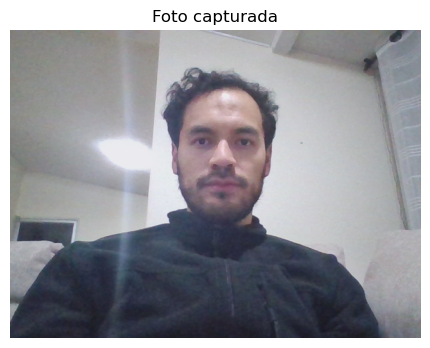

In [3]:
import cv2
# Captura de foto desde cámara
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise RuntimeError("No se pudo acceder a la cámara. Revisa permisos o si está ocupada.")

print("Cámara lista. Presiona 's' para guardar foto, 'q' para salir.")
foto_bgr = None

while True:
    ret, frame = cap.read()
    if not ret:
        break

    cv2.imshow("Camara (s=guardar, q=salir)", frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord('s'):
        foto_bgr = frame.copy()
        break
    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

if foto_bgr is None:
    raise RuntimeError("No se capturó foto. Reintenta.")

print("Características de la foto capturada:")
print(" - Alto x Ancho:", foto_bgr.shape[:2])
print(" - Shape:", foto_bgr.shape)
print(" - Tipo:", foto_bgr.dtype)

foto_path = save_image("foto_camara.jpg", foto_bgr)
print("Guardado:", foto_path)

show(bgr_to_rgb(foto_bgr), "Foto capturada")

Recorte guardado: foto_ojos.jpg


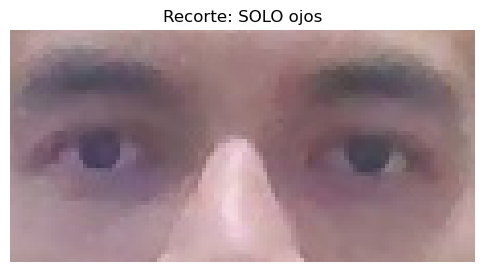

In [4]:
# Recorte SOLO ojos (manual con selectROI)
img = cv2.imread("foto_camara.jpg")
if img is None:
    raise FileNotFoundError("No existe foto_camara.jpg")

roi = cv2.selectROI("Selecciona SOLO los ojos y presiona ENTER", img, showCrosshair=True)
cv2.destroyAllWindows()

x, y, w, h = roi
if w == 0 or h == 0:
    raise RuntimeError("No se seleccionó un ROI válido.")

ojos = img[y:y+h, x:x+w]
ojos_path = save_image("foto_ojos.jpg", ojos)
print("Recorte guardado:", ojos_path)

show(bgr_to_rgb(ojos), "Recorte: SOLO ojos")


## 3) Misma foto: rotar 180°, reflejo y mejorar enfoque
Aporte extra: guardo todas las salidas con nombres claros.

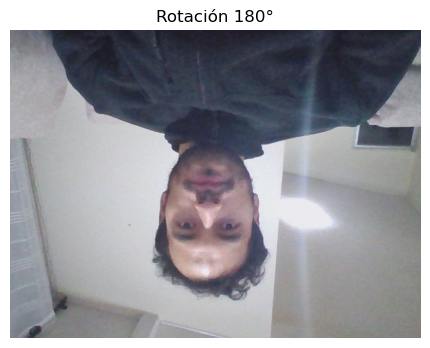

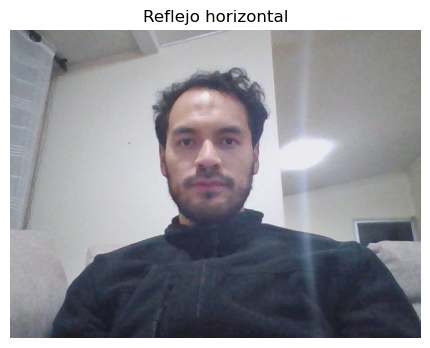

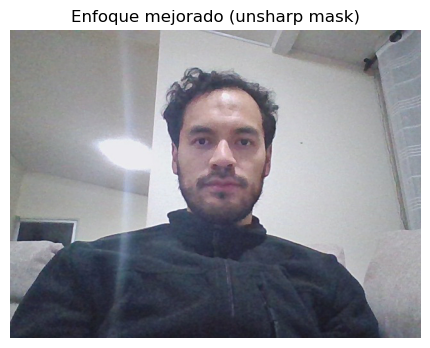

Listo: foto_rot180.jpg, foto_reflejo.jpg, foto_enfoque.jpg


In [5]:
img = cv2.imread("foto_camara.jpg")
if img is None:
    raise FileNotFoundError("No existe foto_camara.jpg")

rot180 = cv2.rotate(img, cv2.ROTATE_180)
reflejo = cv2.flip(img, 1)  # espejo horizontal

# Enfoque: Unsharp mask (aporte extra, mejora real)
blur = cv2.GaussianBlur(img, (0,0), 2.0)
enfoque = cv2.addWeighted(img, 1.5, blur, -0.5, 0)

save_image("foto_rot180.jpg", rot180)
save_image("foto_reflejo.jpg", reflejo)
save_image("foto_enfoque.jpg", enfoque)

show(bgr_to_rgb(rot180), "Rotación 180°")
show(bgr_to_rgb(reflejo), "Reflejo horizontal")
show(bgr_to_rgb(enfoque), "Enfoque mejorado (unsharp mask)")
print("Listo: foto_rot180.jpg, foto_reflejo.jpg, foto_enfoque.jpg")
